In [100]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing

from skimage.morphology import footprint_rectangle

# Operadores de dilatación y erosión

## Cargue y visualice la imagen morpho.png

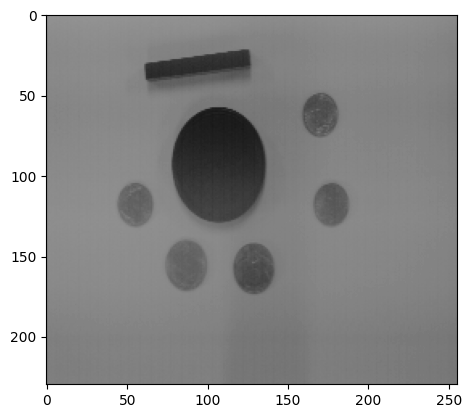

In [101]:
morpho = cv2.imread('images/morpho.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(morpho, cmap='gray', vmin=0, vmax=255)
plt.show()

## Haga una umbralización de esta imagen, para obtener objetos negros sobre fondo blanco (umbral alrededor de 115).

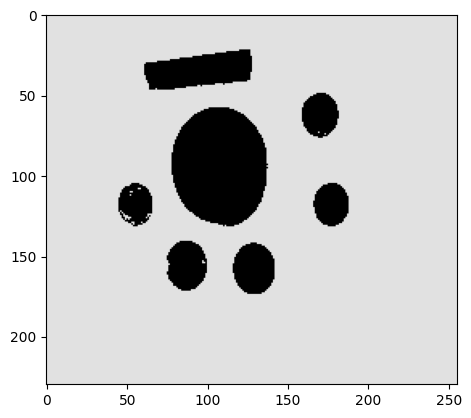

In [102]:
thres_value, thres_morpho = cv2.threshold(morpho, 113, 225, cv2.THRESH_BINARY)
plt.imshow(thres_morpho, cmap='gray', vmin=0, vmax=255)
plt.show()

## Se desea eliminar los objetos de dimensión pequeña. Para hacer esto, se va a reducir el tamaño de todos los objetos, hasta que quede únicamente el más grande. Después se "inflará" de nuevo el objeto que quedó. Recuerde que la erosión reduce el tamaño de los objetos claros y que la dilatación aumenta su tamaño. En nuestro caso, los objetos son oscuros. Por consiguiente, para reducir su tamaño, es necesario dilatar el fondo claro.

## Sobre la imagen binaria efectúe una dilatación con un elemento estructurante o máscara cuadrada de 29x29. ¿Qué obtiene como resultado?

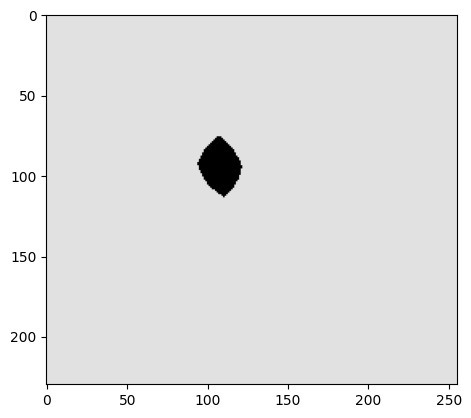

In [103]:
dilated_morpho = dilation(thres_morpho, footprint=footprint_rectangle((29,29)))
plt.imshow(dilated_morpho, cmap='gray', vmin=0, vmax=255)
plt.show()

Como se puede apreciar, solo queda visible el objeto más grande de la imagen, y este ha pasado de tener forma redonda a cuadrada. Además de haber reducido su tamaño.

## Sobre la imagen resultante, haga una erosión con la misma máscara. ¿Cómo es el objeto obtenido con respecto al original?

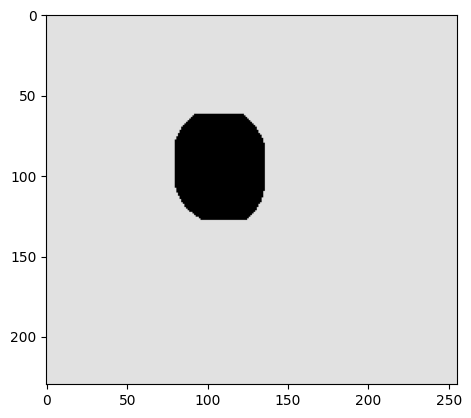

In [104]:
eroded_morpho = erosion(dilated_morpho, footprint=footprint_rectangle((29,29)))
plt.imshow(eroded_morpho, cmap='gray', vmin=0, vmax=255)
plt.show()

Como se aprecia en las imagenes, la erosión aumenta el tamaño de los objetos, mientras que la dilatación reduce su tamaño.

## Sobre la imagen resultado del punto anterior, haga una erosión con una máscara en cruz, de tamaño 11x11. Las máscaras en cruz deben crearse generando una matriz de nxn (tamaño deseado) y colocando 1’ s en la cruz. Los demás elementos se deben dejar vacíos (SIN CEROS).

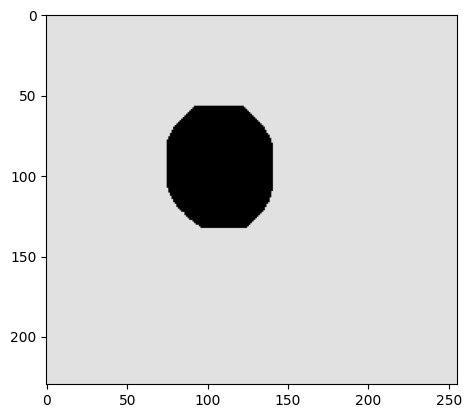

In [105]:
kernel = np.zeros((11,11), dtype=np.uint8)
kernel[:, (11//2)] = 1 
kernel[(11//2), :] = 1  

eroded_morpho2 = erosion(eroded_morpho, footprint=kernel)
plt.imshow(eroded_morpho2, cmap='gray', vmin=0, vmax=255)
plt.show()

## Calcule el máximo entre esta última imagen y la imagen original umbralizada. ¿Cómo es el resultado obtenido?

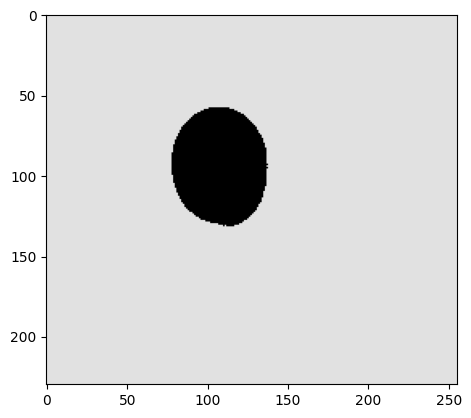

In [106]:
max_morpho = cv2.max(eroded_morpho2, thres_morpho)
plt.imshow(max_morpho, cmap='gray', vmin=0, vmax=255)
plt.show()

Como se puede observar, se obtiene la silueta del objeto más grande de la imagen original.

## Repita las operaciones 1 a 4, trabajando directamente con la imagen original no umbralizada (en niveles de gris).

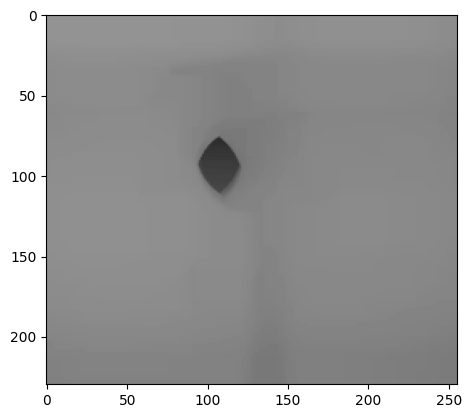

In [107]:
dilation_morpho_2 = dilation(morpho, footprint=footprint_rectangle((29,29)))
plt.imshow(dilation_morpho_2, cmap='gray', vmin=0, vmax=255)
plt.show()

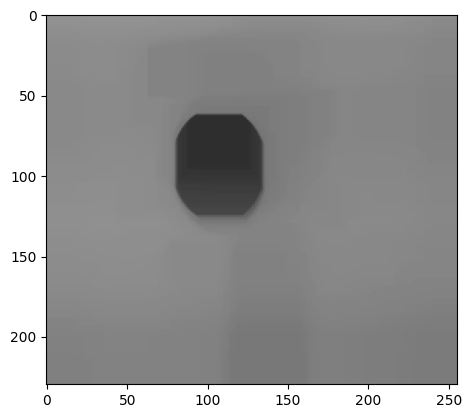

In [108]:
eroded_morpho_2 = erosion(dilation_morpho_2, footprint=footprint_rectangle((29,29)))
plt.imshow(eroded_morpho_2, cmap='gray', vmin=0, vmax=255)
plt.show()

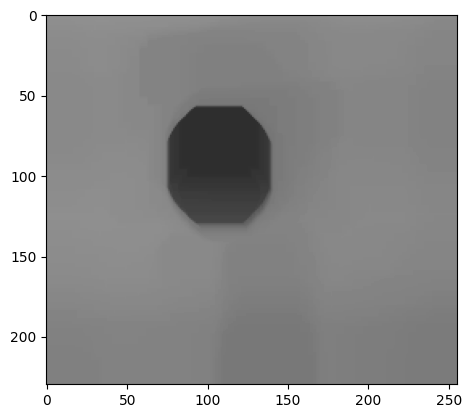

In [112]:
kernel = np.zeros((11,11), dtype=np.uint8)
kernel[:, (11//2)] = 1 
kernel[(11//2), :] = 1  

eroded_morpho2_2 = erosion(eroded_morpho_2, footprint=kernel)
plt.imshow(eroded_morpho2_2, cmap='gray', vmin=0, vmax=255)
plt.show()

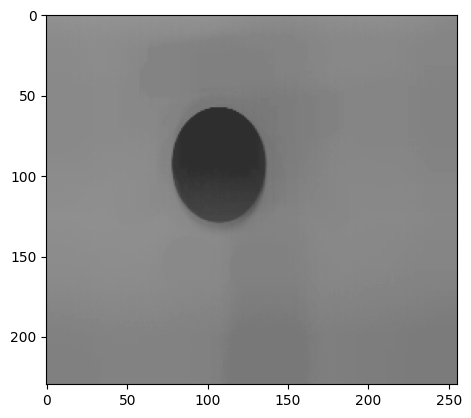

In [110]:
max_morpho_2 = cv2.max(eroded_morpho2_2, morpho)
plt.imshow(max_morpho_2, cmap='gray', vmin=0, vmax=255)
plt.show()

## ¿Cómo funcionan las operaciones de erosión y de dilatación en imágenes en niveles de gris?

La erosión y dilatación en imágenes en niveles de gris operan mediante un elemento estructurante que recorre la imagen. En la erosión, cada píxel se reemplaza por el valor mínimo dentro de la vecindad definida por el elemento estructurante, lo que atenúa las regiones brillantes y reduce el tamaño de los objetos claros. La dilatación, en cambio, sustituye cada píxel por el valor máximo de la vecindad, ampliando las zonas brillantes y suavizando las oscuras. Estas operaciones modifican las intensidades, enfatizando o difuminando detalles según la forma y tamaño del elemento estructurante.

## ¿Cómo es el resultado obtenido sobre la imagen en niveles de gris, comparado con el resultado sobre la imagen binaria?

En imágenes binarias, la erosión reduce y la dilatación expande los bordes de los objetos, alterando su forma geométrica. En niveles de gris, en lugar de modificar fronteras, ajustan las intensidades: la erosión oscurece áreas (minimizando valores) y la dilatación las aclara (maximizando valores). Mientras en binarias el efecto es puramente estructural, en escalas de gris se influye en el contraste y texturas, preservando o alterando gradientes de intensidad en función del elemento estructurante.